In [99]:
'''
Ce projet focalise sur l'utilisation d'un nlp pour detecter  si un email est ham(bon email) ou bien spam 
spam(email avec envoye avec intention mauvaise). 

L'algorithm la plus efficace pour ce type de travail est l'algorithme de Naive-Bayes
          P(B/A)*P(A)
 P(A|B) = -----------
            P(B)
       

L'algorithme de Naives-Bayes  consiste 3 type:

1.Binomial Naive Bayes
2.Multinomial Naive Bayes 
3.Gaussian Naive-Bayes

Pour Notre Projet , Multiomial est le plus favorable.



'''

"\nCe projet focalise sur l'utilisation d'un nlp pour detecter  si un email est ham(bon email) ou bien spam \nspam(email avec envoye avec intention mauvaise). \n\nL'algorithm la plus efficace pour ce type de travail est l'algorithme de Naive-Bayes\n          P(B/A)*P(A)\n P(A|B) = -----------\n            P(B)\n       \n\nL'algorithme de Naives-Bayes  consiste 3 type:\n\n1.Binomial Naive Bayes\n2.Multinomial Naive Bayes \n3.Gaussian Naive-Bayes\n\nPour Notre Projet , Multiomial est le plus favorable.\n\nMais pourquoi?\n\n\n"

In [102]:
'''
Dans ce projet on va utilise python3.7
le bibliotheques on va utlise sont :
pandas== pour interroger notre file csv
scikit(sklearn)===Nous donne beaucoup des algorithme. On va trouver notre Algoritme(MultinomialNB) ici 
matplotlib === pour les graphes

'''

'\nDans ce projet on va utilise python3.7\nle bibliotheques on va utlise sont :\npandas== pour interroger notre file csv\nscikit(sklearn)===Nous donne beaucoup des algorithme. On va trouver notre Algoritme(MultinomialNB) ici \nmatplotlib === pour les graphes\n\n'

In [ ]:
'''
pour le datasets , on a pas reussi a trouver des datasets en francais. Alors on a utilise le datasets d'anglais 
qui etais trouver dans le site kaggle(https://www.kaggle.com/).
la taille de le dataset est 489KB

'''

In [106]:

import pandas as pd  # on a importer pandas 
df=pd.read_csv('spam-ham.csv') # on  a utilise  pandas a ouvrier notre dataset 
# df  est un Dataframe qui est seulement le struture donne utilise par  pandas , il se comporte comme le strucyure de donne 
# "dict" de python
# pour verifier 
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head() # le attribute head nous donne les premiers 5 de notre dataset

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.tail() # le denier 5 des notres dataset

,type,text
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [107]:
df.index # indique le nobre de lignes dans notre dataset
# qui est 5574

RangeIndex(start=0, stop=5574, step=1)

In [17]:
df.columns # pour voir le colonnes 
# dans notre cas 
# type et le text

Index(['type', 'text'], dtype='object')

In [10]:
df.dtypes # le types de chaque colonnes

type    object
text    object
dtype: object

In [14]:
df['type'][-10:]  # pour etudier notre csv 
#precisement, nous donne le dernier 10 elements des notre dataset

5564     ham
5565     ham
5566     ham
5567     ham
5568    spam
5569    spam
5570     ham
5571     ham
5572     ham
5573     ham
Name: type, dtype: object

In [24]:
df.loc[12:13,['text','type']] # seulement pour interrogation
# de notre dataset
#loc nous permettre de facilement faire certaines operation

,text,type
12,URGENT! You have won a 1 week FREE membership ...,spam
13,I've been searching for the right words to tha...,ham


In [ ]:
#Dans machine learning on peux pas utilise  des texts dans notre model
#les algorithmes de machine learning comprends que des numeros
#alors on doit convertir 
# le dependent 'type' a  numero 
# aussi les independent 'text' doit aussi etre convertir en numero 

In [50]:
# on commence avec  le dependant 
# si le email est spam on le represet pas 1
#sinon pas 0
 

df['spam']=df['type'].apply(lambda x:1 if x=='spam' else 0)#ici on a cre un notre champ spam  qui 
#vas contenir 0 pour ham et 1 pour spam 
#on a applique  a df['type'] un fonction lambda qui nous donne 1  quand il voit spam sinon 0

df# on visualise notre nouveau dataframe
#on voit le nouveau champ spam


,type,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,1
5570,ham,Will ü b going to esplanade fr home?,0
5571,ham,"Pity, * was in mood for that. So...any other s...",0
5572,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
#on doit aussi convertir notre 
#text dans un array des nombres
#et pour faire ca 
#on vas utiliser le 
#CountVectorizer  qui peut etre trouver dans sklearn.feature extraction


dict_keys(['maroc', 'a', 'beautiful', 'country', 'with', 'history'])
dict_values([1, 2, 2, 1, 1, 1])


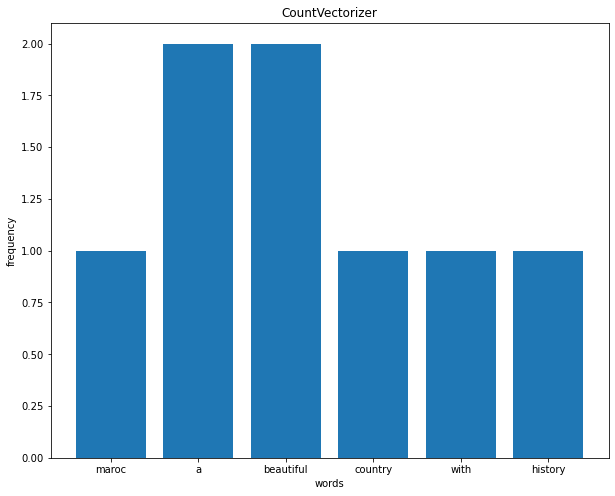

In [112]:
#comment le CountVectorizer marche?
#comment il converti les text 

#on prends ces mot
# ''''''maroc a beautiful country with a beautiful history''''''
#
#Le CountVectorizer  va compter la frequence de chaque mots
words={'maroc':1,
 'a':2,
 'beautiful':2,
 'country':1,
 'with':1,
 'history':1
 }

y=words.values()
x=words.keys()
print(x)
print(y)
#on utilise matplotlib pour visualiser 
import matplotlib.pyplot  as plt 
plt.figure(figsize=(10,8))
plt.bar(x,y,align='center')
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('CountVectorizer')
plt.show()

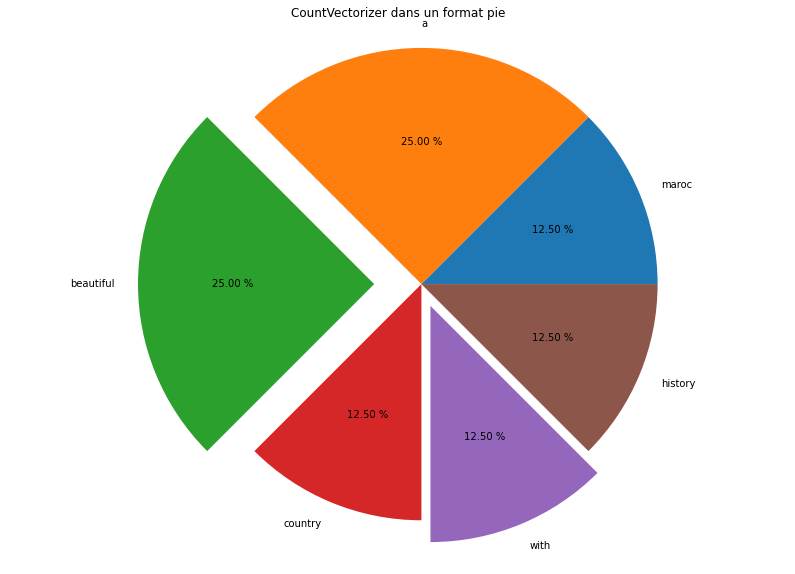

In [135]:
# le meme graph mais on pie 
plt.figure(figsize=(14,10))
plt.pie(y,labels=x,autopct='%0.2f %%',explode=[0,0,0.2,0,0.1,0])
plt.axis('equal')
plt.title('CountVectorizer dans un format pie')
plt.show()

In [136]:

from sklearn.feature_extraction.text import CountVectorizer

In [149]:
#Alors CountVectorizer va convertir  chaque lignes de text en frequence de apparitions 
v=CountVectorizer()  #instant de CV
x=v.fit_transform(df.text)#la conversion du text au nombres comme explique auparavant 
print(any(x.toarray()[0])) #mets toute le nuombres dans un array,on fait ca pour integre facilement avec notre algorithme

True


In [ ]:
#le Count Vectorizer est tres import parceque grace a lui on va 
#detecter la frequence de mots qui apparait dans uns email 
#spam 
#Et notre algorithme MultiomialNB va exploiter ca pour classifier
#les text qui contient des mots qui frequent beaucoup dans de email spam
#

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline  import Pipeline
from sklearn.model_selection import train_test_split 

In [ ]:
#t'train test split' nous pemettre de separer notre dataset en deux partie 
# la partie pour entrainer , et celui de tester. 
#Dans notre car on prends 75% pour entrainer et 25% pour tester


In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(df.text,df.spam.astype('int'),test_size=0.25)
print (X_train)
print (type(Y_train))

1875    Would you like to see my XXX pics they are so ...
572                 Do you know where my lab goggles went
2729    Urgent Please call 09066612661 from landline. ...
4120    Hiya do u like the hlday pics looked horrible ...
2989                       Do you still have the grinder?
                              ...                        
1770    Ha... Both of us doing e same thing. But i got...
2976        Don't worry, * is easy once have ingredients!
774     I wil be there with in  &lt;#&gt;  minutes. Go...
93      Please call our customer service representativ...
4189    Mm umma ask vava also to come tell him can pla...
Name: text, Length: 4180, dtype: object
<class 'pandas.core.series.Series'>


In [ ]:
#le Pipeline nous permettre de   de utilser notre Count Vectorizer avec notre algorithme machine learning.

In [88]:
clf=Pipeline([('vectorizer',CountVectorizer()),('nb',MultinomialNB())])#instant

In [89]:
clf.fit(X_train,Y_train) # on entraine notre model

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [90]:
clf.score(X_test,Y_test)#on a tester notre model , qui a plus que 98%.Qui est tres bon

0.9820659971305595

In [150]:
d=['you got 50% discount huraay','am home']# on donne les examples qui n'etaient pas present dans le dataset
clf.predict(d) # on fait la prediction 

array([1, 0])